# Index
- SPY TLT IEF GLD

In [1]:
import random
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import matplotlib.pyplot as plt


tickers = [
    'SPY',  # 미국 주식
#     'IEV',  # 유럽 주식 
#     'EWJ',  # 일본 주식
#     'EEM',  # 이머징 주식
    'TLT',  # 미국 장기채
    'IEF',  # 미국 중기채
#     'IYR',  # 미국 리츠
#     'RWX',  # 글로벌 리츠
    'GLD',  # 금
]

yf.pdr_override()

# 수정주가를 담을 빈 데이터프레임을 미리 준비한다
pxclose = pd.DataFrame( )

# for 루프를 만들어 tickers 리스트를 반복하면서 종목 코드를 꺼내고
# DataReader 함수를 사용해 수정주가 데이터를 내려받는다
# 데이터는 야후 파이낸스를 통해 얻는다

for item in tickers:
    pxclose[ item ] = web.get_data_yahoo(item, start='2019-01-01')[ 'Adj Close' ]
    
# for item in tickers:
#     pxclose[ item ] = web.get_data_yahoo(item, start='2015-01-01', end='2019-01-01')[ 'Adj Close' ]

# pandas의 pct_change 함수는 데이터의 변화량을 %로 계산한다
# 일간 수정주가 데이터를 일간수익률로 변환해 dailySimpleReturns에 저장한다


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
ret_daily = pxclose.pct_change(1)
ret_annual = ret_daily.mean() * 250

# 일간수익률의 공분산을 계산하고 연간 단위로 만든다
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

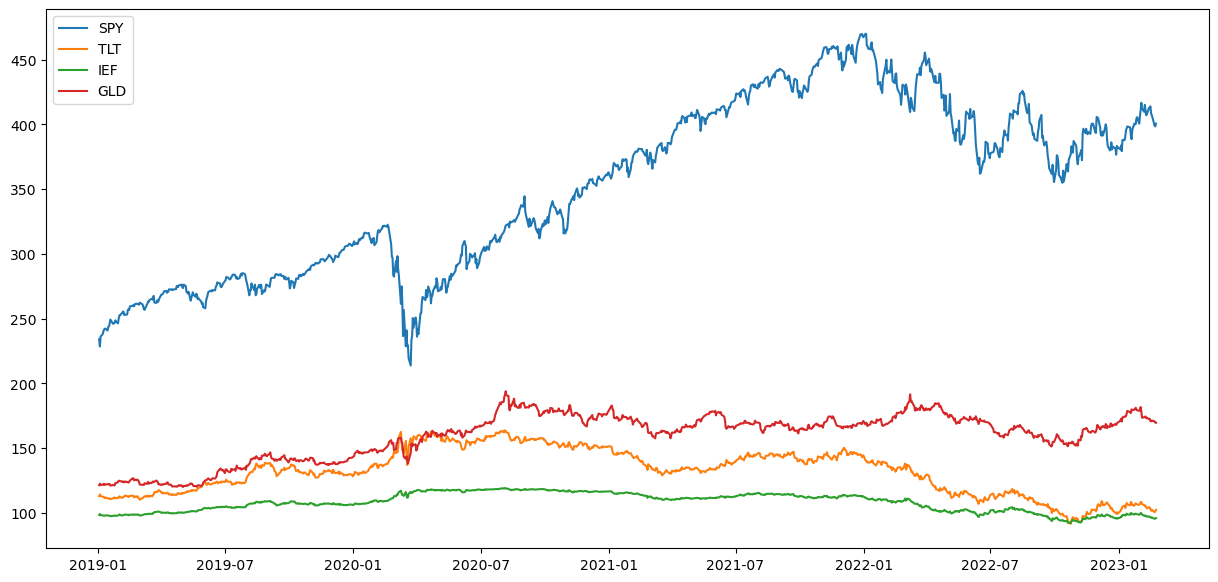

In [3]:
plt.figure(figsize=(15,7))
for i in tickers:
    plt.plot(pxclose.index,pxclose[i], label = i)
plt.legend(loc = 2)
plt.show();

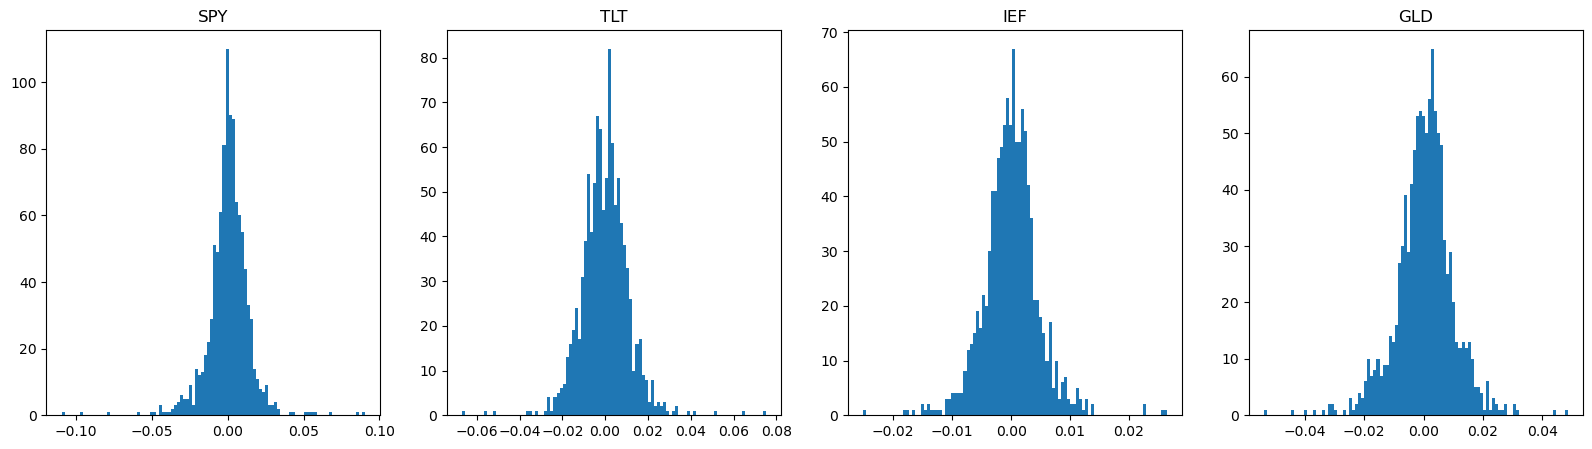

In [7]:
ret_daily = pxclose.pct_change( )
tickers
plt.figure(figsize=(25,5))

for i, t in enumerate(tickers):
    plt.subplot(151+i)
    plt.hist(ret_daily[t], bins=100)
    plt.title(t)

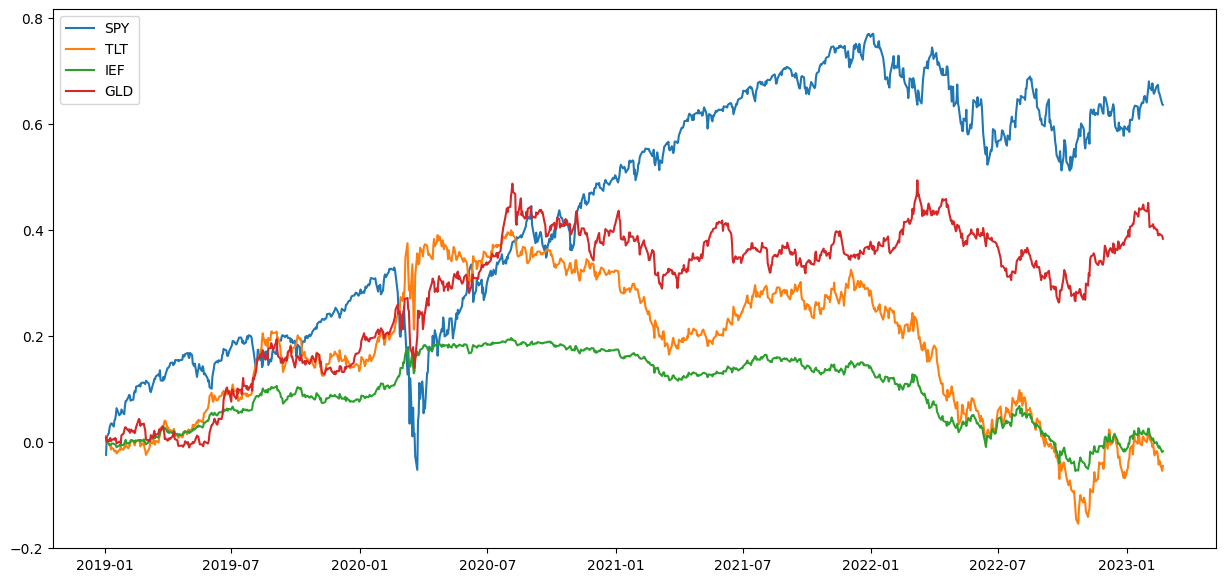

In [54]:
ret_daily_cs=ret_daily.cumsum()
plt.figure(figsize=(15,7))
for i in tickers:
    plt.plot(ret_daily_cs.index,ret_daily_cs[i], label = i)
plt.legend(loc = 2)
plt.show();

# Opt pf

In [32]:
# 종가수익률 평균에 250(1년 중 시장이 열리는 일수)을 곱해 기대수익률을 만든다
ret_daily = pxclose.pct_change( )
ret_annual = ret_daily.mean( ) * 250

# 일간수익률의 공분산을 계산하고 연간 단위로 만든다
cov_daily = ret_daily.cov( )
cov_annual = cov_daily * 250

# risk-free rate
rf = 0.045

In [33]:
# 포트폴리오 수익률, 변동성, 투자 비중을 저장할 변수를 미리 준비한다
p_returns = []       # portfolio return
p_volatility = []      # portfolio risk
p_weights = []   # weights
sharpe_ratio = []   # sharpe ratio = return/risk
 
n_assets = len(tickers) # len( ) 함수로 투자자산의 수를 계산한다
n_ports = 30000 # 다섯 개 종목으로 투자 비중을 바꿔 3만 개의 포트폴리오를 만들 것이다

# n_ports만큼 반복하면서 자산의 투자 비중을 랜덤하게 만들고 포트폴리오의 기대수익률, 변동성을 계산한다
# 계산한 수익률, 변동성, 투자 비중은 앞서 미리 준비한 변수, p_returns, p_volatility, p_weights에 저장한다

for s in range( n_ports ):

    wgt = np.random.random( n_assets )
    wgt /= np.sum(wgt)
    ret = np.dot(wgt, ret_annual ) - rf # excess return
    vol = np.sqrt( np.dot( wgt.T, np.dot( cov_annual, wgt ) ) )

    # append values to lists
    p_returns.append(ret)                    
    p_volatility.append(vol) 
    p_weights.append(wgt) 
    sharpe_ratio.append(ret/vol)  

In [34]:
# get dict of Retunrs, Risk, Sharpe, Weights
portfolio = {'Returns': p_returns, 'Risk': p_volatility, 'Sharpe' : sharpe_ratio}
for i, s in enumerate(tickers): 
    portfolio[s] = [wgt[i] for wgt in p_weights] 
    
# from dict to dataframe
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk','Sharpe'] + [s for s in tickers]] 

In [35]:
# Mean-Varinance portfolio : Maximum of Sharpe Ratio(tangent portfolio)
max_sharpe = df.loc[df['Sharpe'] ==df['Sharpe'].max()]

# Mininum-Variance portfolio : Minimum of Variance
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

In [36]:
max_sharpe

,Returns,Risk,Sharpe,SPY,TLT,IEF,GLD
14663,0.081698,0.151488,0.539305,0.59126,0.0037,0.008323,0.396717


- SPY와 GLD의 비중이 대부분을 차지

In [37]:
min_risk

,Returns,Risk,Sharpe,SPY,TLT,IEF,GLD
72,-0.026974,0.066795,-0.403829,0.123388,0.009851,0.837494,0.029267


- IEF 단기채 비중이 84.20%로 가장 높다

In [39]:
max_sharpe

,Returns,Risk,Sharpe,SPY,TLT,IEF,GLD
14663,0.081698,0.151488,0.539305,0.59126,0.0037,0.008323,0.396717


In [40]:
max_sharpe['Risk'].values[0]

0.15148802383685933

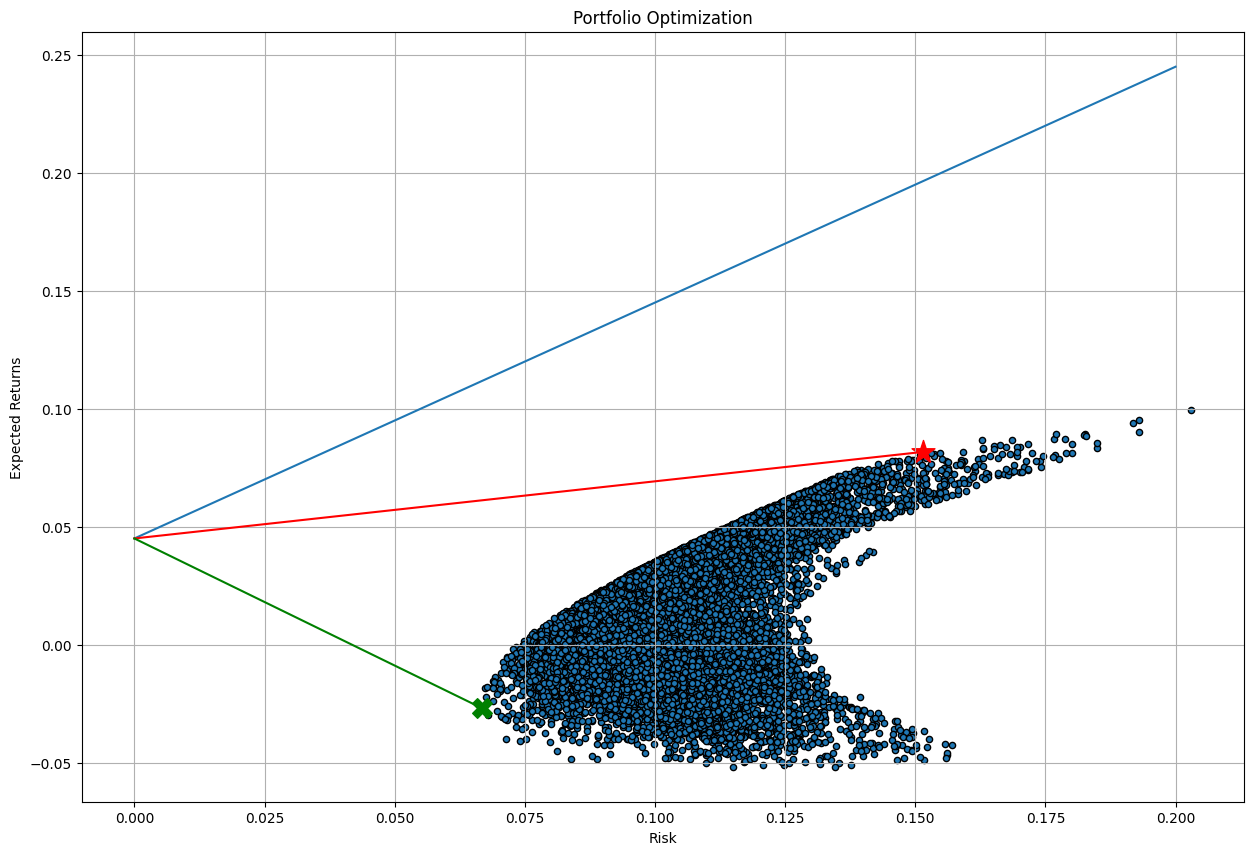

In [49]:
# Mean-Varinance portfolio : Maximum of Sharpe Ratio(tangent portfolio)
max_sharpe = df.loc[df['Sharpe'] ==df['Sharpe'].max()]

# Mininum-Variance portfolio : Minimum of Variance
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

df.plot.scatter(x='Risk', y='Returns', #c='Sharpe', 
                cmap='viridis', edgecolors='k', 
                figsize=(15,10), grid=True) 

plt.scatter(x = max_sharpe['Risk'], y = max_sharpe['Returns'], 
            c ='r', marker='*', s = 300)       # Mean-Varinance portfolio: *
plt.scatter(x = min_risk['Risk'], y = min_risk['Returns'], 
            c = 'g', marker='X', s = 200)      # Mininum-Variance portfolio: X

plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
# plt.ylim(0,0.3)
# plt.xlim(0,0.4)

plt.plot([0, 0.2], [rf, 0.2+rf])
plt.plot([0, max_sharpe['Risk'].values[0]], [rf, max_sharpe['Returns'].values[0]], color="red")
plt.plot([0, min_risk['Risk'].values[0]], [rf, min_risk['Returns'].values[0]], color="green")

plt.show();